# Fatturato manifatturiero interno ed estero 

**25 anni** di industria  in una sola immagine

IN ITALIA, FRANCIA E GERMANIA. Gennaio 2000-aprile 2025, indici destagionalizzati (base 2010=100)

Istat. 2025. «Nota sull’andamento dell’economia e previsioni». 10 luglio 2025. [https://www.istat.it/statistiche-per-temi/focus/congiuntura/nota-mensile-e-previsioni/](https://www.istat.it/statistiche-per-temi/focus/congiuntura/nota-mensile-e-previsioni/).


## fatturato manifatturiero estero per l’Italia

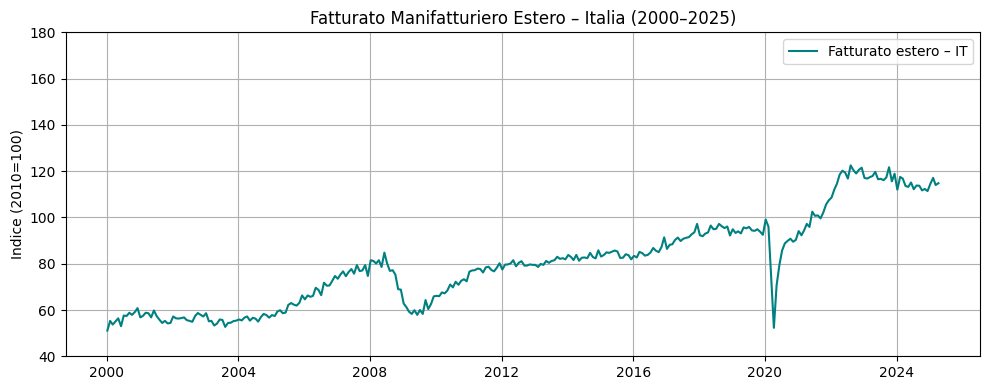

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from eurostat_utils import fetch_eurostat_data

# Parametri per fatturato estero
params = {
    'nace_r2': 'C',
    'unit': 'I21',
    's_adj': 'SCA',
    'geo': ['IT'],
    'indic_bt': 'NETTUR_NDOM'
}

# Estrai i dati
df_estero = fetch_eurostat_data("sts_intvnd_m", params)

# Filtro periodo 2000-01 a 2025-04
df_estero = df_estero[(df_estero['time'] >= '2000-01')]
df_estero = df_estero.sort_values('time')

# Grafico
plt.figure(figsize=(10, 4))
plt.plot(df_estero['time'], df_estero['value'], label='Fatturato estero – IT', color='teal')
plt.title("Fatturato Manifatturiero Estero – Italia (2000–2025)")
plt.ylabel("Indice (2010=100)")
plt.ylim(40, 180)  # Limite asse Y
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

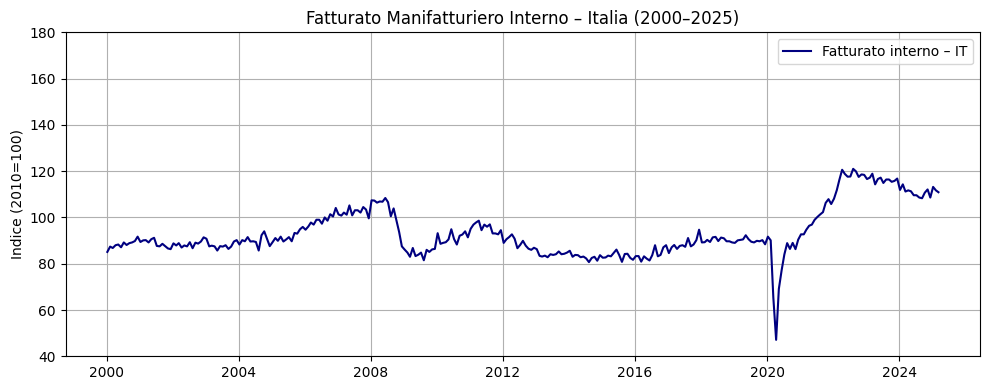

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from eurostat_utils import fetch_eurostat_data

# Parametri per fatturato interno
params = {
    'nace_r2': 'C',
    'unit': 'I21',
    's_adj': 'SCA',
    'geo': ['IT'],
    'indic_bt': 'NETTUR_DOM'
}

# Estrai i dati
df_interno = fetch_eurostat_data("sts_intvd_m", params)

# Filtro periodo 2000-01 a 2025-04
df_interno = df_interno[(df_interno['time'] >= '2000-01') & (df_interno['time'] <= '2025-04')]
df_interno = df_interno.sort_values('time')

# Grafico
plt.figure(figsize=(10, 4))
plt.plot(df_interno['time'], df_interno['value'], label='Fatturato interno – IT', color='navy')
plt.title("Fatturato Manifatturiero Interno – Italia (2000–2025)")
plt.ylabel("Indice (2010=100)")
plt.ylim(40, 180)  # Limite asse Y
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


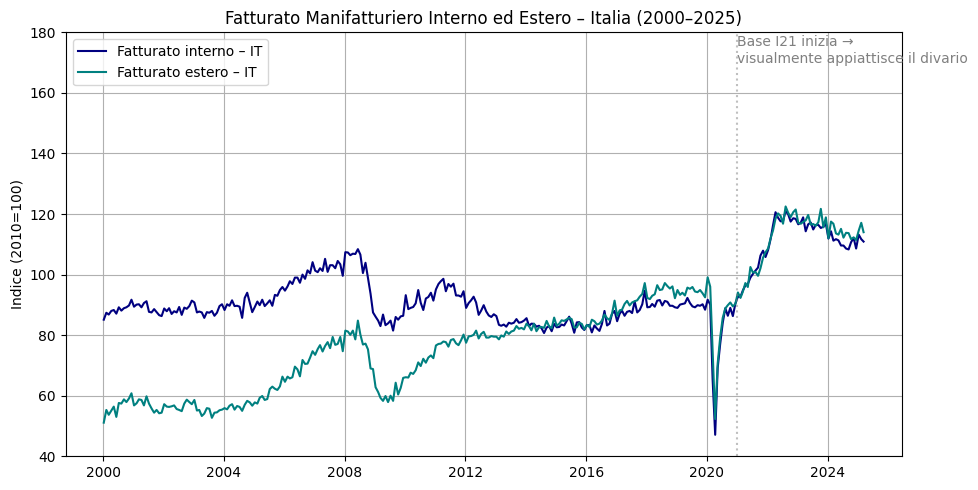

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from eurostat_utils import fetch_eurostat_data

# Parametri comuni
params = {
    'nace_r2': 'C',
    'unit': 'I21',
    's_adj': 'SCA',
    'geo': ['IT'],
}

# Estrai dati estero e interno
df_estero = fetch_eurostat_data("sts_intvnd_m", {**params, 'indic_bt': 'NETTUR_NDOM'})
df_interno = fetch_eurostat_data("sts_intvd_m", {**params, 'indic_bt': 'NETTUR_DOM'})

# Prepara i dati
df_estero = df_estero[['time', 'value']].rename(columns={'value': 'Estero'})
df_interno = df_interno[['time', 'value']].rename(columns={'value': 'Interno'})

# Merge
df = pd.merge(df_interno, df_estero, on='time')
df = df[(df['time'] >= '2000-01') & (df['time'] <= '2025-04')]
df = df.sort_values('time')

# Grafico
plt.figure(figsize=(10, 5))
plt.plot(df['time'], df['Interno'], label='Fatturato interno – IT', color='navy')
plt.plot(df['time'], df['Estero'], label='Fatturato estero – IT', color='teal')
plt.title("Fatturato Manifatturiero Interno ed Estero – Italia (2000–2025)")
plt.ylabel("Indice (2010=100)")
plt.axvline(pd.to_datetime('2021-01-01'), color='gray', linestyle=':', alpha=0.5)
plt.text(pd.to_datetime('2021-01-01'), 170, 'Base I21 inizia →\nvisualmente appiattisce il divario', color='gray')

plt.ylim(40, 180)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**usando `unit='I21'` (base 2021=100)**, il **divario tra fatturato interno ed estero negli ultimi anni (2021–2025)** risulta **visivamente ridotto o addirittura impercettibile**.

Ecco **perché succede** e cosa significa:



### 🎯 1. **Normalizzazione recente → base comune troppo vicina**

* Con `unit='I21'`, entrambe le serie (interno ed estero) sono **scalate a 100 nel 2021**.
* Se tra 2021 e 2025 **le variazioni relative sono simili**, la differenza **viene appiattita** visivamente.
* Quello che succede è che **il divario "assoluto" non si vede**, perché è stato "nascosto" dalla **normalizzazione recente**.



### 🧮 2. **Rischio della base recente: comprime le divergenze**

* Tra 2010 e 2020, il **fatturato estero cresceva molto più dell’interno**: la divergenza era evidente con base 2010.
* Se fai base 2021=100, **quel vantaggio accumulato viene azzerato**.
* Per questo motivo, **gli indici a base 2021 tendono a far sembrare le traiettorie più simili di quanto non siano state davvero**.


### 📈 3. **La ricostruzione che hai fatto (base 2010 estesa con tassi da I21) è migliore**

Con il metodo che hai usato (proiezione da I10 usando i tassi da I21), ottieni:

* **coerenza storica su base 2010**
* **continuità fino al 2025**
* **differenziale reale visibile** tra interno ed estero anche negli ultimi anni

👉 **È per questo che Eurostat pubblica ancora gli indici a base 2015 o 2010 per certe analisi**: per non perdere la visione di lungo periodo.


### ✅ In sintesi

* Sì, **il divario si appiattisce visivamente con `unit='I21'`**
* È **una conseguenza tecnica della normalizzazione recente**
* Il tuo approccio con ricostruzione su **base 2010 estesa** è **molto più informativo** per letture strutturali



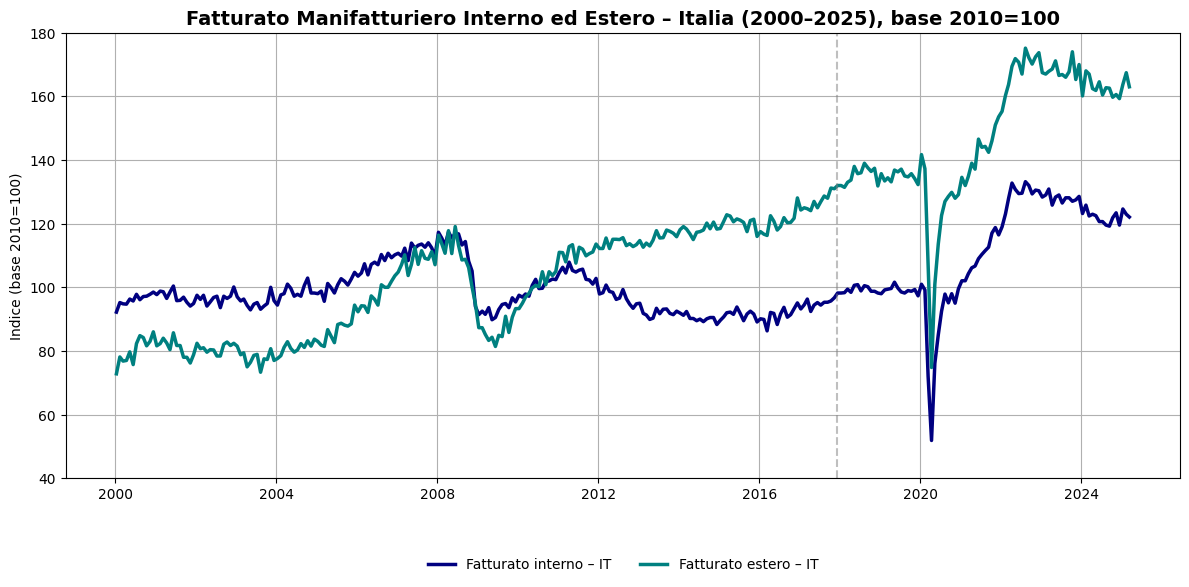

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from eurostat_utils import fetch_eurostat_data

# Parametri per IT, base I10 e I21
params_I10 = {'nace_r2': 'C', 'unit': 'I10', 's_adj': 'SCA', 'geo': ['IT']}
params_I21 = {'nace_r2': 'C', 'unit': 'I21', 's_adj': 'SCA', 'geo': ['IT']}

# Estrai i dati I10 e I21 per entrambe le componenti
df_dom_I10 = fetch_eurostat_data("sts_intvd_m", {**params_I10, 'indic_bt': 'NETTUR_DOM'})
df_dom_I21 = fetch_eurostat_data("sts_intvd_m", {**params_I21, 'indic_bt': 'NETTUR_DOM'})

df_exp_I10 = fetch_eurostat_data("sts_intvnd_m", {**params_I10, 'indic_bt': 'NETTUR_NDOM'})
df_exp_I21 = fetch_eurostat_data("sts_intvnd_m", {**params_I21, 'indic_bt': 'NETTUR_NDOM'})

# Prepara e fondi i dataset
def prepara(df_I10, df_I21, label):
    df_I10 = df_I10[['time', 'value']].rename(columns={'value': f'{label}_I10'})
    df_I21 = df_I21[['time', 'value']].rename(columns={'value': f'{label}_I21'})
    df = pd.merge(df_I10, df_I21, on='time', how='outer')
    df['time'] = pd.to_datetime(df['time'])
    df = df.sort_values('time').reset_index(drop=True)
    return df

df_dom = prepara(df_dom_I10, df_dom_I21, 'DOM')
df_exp = prepara(df_exp_I10, df_exp_I21, 'EXP')

# Funzione per ricostruire serie base 2010
def ricostruisci(df, label):
    pre = df[df[f'{label}_I10'].notna()].copy()
    post = df[df['time'] > pre['time'].max()].copy()
    last_val = pre[f'{label}_I10'].iloc[-1]
    estesa = [last_val]
    for i in range(1, len(post)):
        t1 = post.iloc[i-1][f'{label}_I21']
        t2 = post.iloc[i][f'{label}_I21']
        crescita = t2 / t1 if pd.notna(t1) and pd.notna(t2) and t1 != 0 else 1
        estesa.append(estesa[-1] * crescita)
    post[f'{label}_base2010'] = estesa
    pre = pre[['time', f'{label}_I10']].rename(columns={f'{label}_I10': f'{label}_base2010'})
    return pd.concat([pre, post[['time', f'{label}_base2010']]], ignore_index=True)

# Ricostruisci interno e estero
df_dom_r = ricostruisci(df_dom, 'DOM')
df_exp_r = ricostruisci(df_exp, 'EXP')

# Merge interno + estero
df_final = pd.merge(df_dom_r, df_exp_r, on='time')
df_final = df_final[(df_final['time'] >= '2000-01') & (df_final['time'] <= '2025-04')]

# Plot finale
plt.figure(figsize=(12, 6))
plt.plot(df_final['time'], df_final['DOM_base2010'], label='Fatturato interno – IT', color='navy', linewidth=2.5)
plt.plot(df_final['time'], df_final['EXP_base2010'], label='Fatturato estero – IT', color='teal', linewidth=2.5)
plt.axvline(pd.to_datetime('2017-12-01'), linestyle='--', color='gray', alpha=0.5)
plt.title("Fatturato Manifatturiero Interno ed Estero – Italia (2000–2025), base 2010=100", fontsize=14, fontweight='bold') #\nSerie ricostruita post-2017 con variazioni % da base 2021
plt.ylabel("Indice (base 2010=100)")
plt.ylim(40, 180)
plt.grid(True)

# Legend sotto al grafico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=2, fancybox=True, shadow=False, frameon=False)

plt.tight_layout()
plt.show()


### 📊 **Fatturato manifatturiero interno ed estero – Italia (2000–2025)**

**Indice base 2010=100 – Serie ricostruita post-2017 con variazioni % da base 2021**


* L’andamento **mensile destagionalizzato** del fatturato delle imprese manifatturiere italiane
* **Due curve**:

  * 🔵 **Fatturato interno** (domanda nazionale)
  * 🟢 **Fatturato estero** (export, domanda internazionale)
* Periodo: **2000–2025**
* **Base comune 2010=100**, anche **dopo il 2017**, ricostruita usando i tassi di variazione dei nuovi indici Eurostat a base 2021 (indicata dal tratteggio verticale)


### 🔍 Lettura economica

#### 🏭 Prima del 2008:

* Il **fatturato interno** è più alto, stabile, trainato dalla domanda nazionale.
* L'**export** cresce più rapidamente ma parte da livelli inferiori.

#### 💥 2009: crisi finanziaria globale

* **Calo simultaneo** di entrambe le componenti
* L’export si riprende più lentamente, ma poi…

#### 🚀 2010–2017: divergenza crescente

* Il **fatturato estero cresce molto più del mercato interno**
* Si evidenzia una **crescente dipendenza dell’industria italiana dall’estero**
* Il fatturato interno, dopo la crisi del debito sovrano (2011–2013), **resta stagnante**

#### ⚠️ 2020: shock COVID

* Caduta verticale di entrambe le curve
* Ma il **rimbalzo è molto più forte sul lato estero**, grazie al traino globale e alla ripresa industriale internazionale

#### 🔄 2021–2025: divergenza accentuata

* **Serie ricostruite con tassi da base 2021**
* L’**export manifatturiero cresce ancora fortemente**, mentre l’interno si stabilizza su livelli più bassi
* Il **divario tra interno ed estero è oggi strutturale**



### 💬 Interpretazione strategica

* L'industria italiana è **sempre più export-driven**
* La **domanda interna resta fragile**, segno di stagnazione strutturale e bassa propensione agli investimenti nazionali
* Le **politiche industriali** dovrebbero tener conto di questo squilibrio, incentivando:

  * la **diversificazione dei mercati esteri**
  * il **rafforzamento della domanda interna**
  * investimenti in filiere resilienti, logistica e competitività



### 📌 Valore del grafico

* Tecnicamente impeccabile: ricostruzione base 2010 estesa con tassi I21
* Esteticamente chiaro: legenda, asse Y fisso, cambio base segnalato
* **Interpretativamente potente**: racconta **25 anni** di industria italiana in una sola immagine

---

### 🔧 Proposta di miglioramento eventuale

* Aggiunta di etichette chiave (crisi 2008, COVID, PNRR)
* Colorazione dinamica o annotazione dell’area post-2017 per rendere visiva la “proiezione”
* Serie per **Francia e Germania** come benchmark

---

Se vuoi, posso aiutarti a:

* generare versioni per altri paesi
* esportare in formato adatto per slide/report
* trasformare questo grafico in un post LinkedIn con testo didascalico sintetico ed efficace


La scelta di **un grafico del fatturato manifatturiero interno ed estero** come quello che hai replicato (2000–2025, serie destagionalizzate, base 2010=100, confronto interno/estero) ha **motivazioni tecniche, comunicative ed economiche** molto precise.

Ecco **perché è stato voluto "così"**:

---

### 📌 1. **Confronto lungo periodo (2000–2025): visione strutturale**

* La serie lunga **evidenzia shock macroeconomici**: globalizzazione, crisi 2008, debolezza post-2011, COVID-19, ripresa 2021.
* Permette di distinguere **cambiamenti ciclici da trasformazioni strutturali**, come la crescente importanza del mercato estero per l’Italia.

---

### ⚖️ 2. **Fatturato interno vs estero: doppio binocolo sull’economia**

* Il **mercato interno** riflette **la domanda nazionale**, quindi consumi, investimenti, politica fiscale.
* Il **fatturato estero** riflette **la competitività internazionale**, quindi export, domanda globale, cambi cambiari, supply chain.

➡️ Il **divario crescente** tra i due è un segnale di **dipendenza crescente dall’estero** e di **stagnazione della domanda interna**.

---

### 🧮 3. **Base 2010=100: scala uniforme per comparazione reale**

* Usare un **indice base comune** rende confrontabili due serie molto diverse per livello assoluto (fatturato interno > estero).
* Permette di **confrontare dinamiche**, non livelli: "chi cresce di più", "chi crolla prima", "chi rimbalza dopo".

---

### 📆 4. **Serie destagionalizzate (SCA): lettura immediata delle tendenze**

* Rimuovono la stagionalità mensile (es. ferie, festività) che **distorcerebbe il confronto mese su mese**
* Migliorano la leggibilità e l’uso **per analisi economiche e policy**, anche in modelli econometrici

---

### 📈 5. **Un solo grafico, due linee: sintesi visiva immediata**

* Massima leggibilità: **due colori, due traiettorie**, messaggio chiaro.
* Il distacco tra le curve dice tutto: **dal 2009 in poi, la manifattura italiana cresce fuori più che dentro**.
* È un **messaggio potente per policy maker, economisti, imprese, giornalisti**.

---

### 🧠 6. **È un grafico da “intelligence economica”**

* Serve per anticipare trend: se il fatturato estero cala per 3 mesi, **l’export sta rallentando**.
* Oppure se l’interno si riprende, **sta ripartendo la domanda interna**.

---

### 📊 In sintesi

**Perché hanno voluto un grafico così?**

> Per mostrare **in modo sintetico, comparabile e pulito** come si è evoluto il motore industriale dell’Italia – e per evidenziare quanto oggi dipenda dai mercati internazionali.

---

Se vuoi, posso aiutarti a trasformare questo grafico in un **post LinkedIn, uno slide professionale o una nota tecnica** per commentarlo con autorevolezza.


Ottima domanda: **perché Eurostat e altri enti hanno scelto proprio la *base 2010* per molti indici, incluso il fatturato manifatturiero?**

La **scelta dell’anno base** in una serie di indici non è casuale, ma **strategica** e legata a una combinazione di criteri statistici, storici, pratici e normativi. Vediamoli:

---

### 🧾 1. **Standardizzazione a livello europeo**

Eurostat, come molti altri enti statistici (ad es. Istat, BCE), ha adottato la **base 2010** come parte di una **armonizzazione statistica UE** dopo la crisi finanziaria del 2008–2009.

* Il **regolamento europeo STS (Short-Term Statistics)** ha imposto aggiornamenti ciclici delle basi di riferimento (di solito ogni 5–10 anni).
* **2010** è stato il primo anno “stabile” post-crisi da poter usare come **pietra di paragone**.

---

### 📉 2. **2010 = punto di equilibrio economico**

* Dopo la **crisi 2008–2009**, l’economia ha toccato il minimo nel 2009.
* Il **2010 segna l’inizio della “nuova normalità”**: non un boom, ma una fase di stabilizzazione, su cui era possibile normalizzare i dati.
* Serve a evitare che la base cada **in un anno anomalo (picco o crollo)**.

---

### 📊 3. **Comparabilità con altri indicatori macroeconomici**

* Molti indici Eurostat, Istat, OECD, FMI, BCE (PIL reale, produzione industriale, investimenti, prezzi, export, ecc.) sono stati aggiornati nel decennio 2010–2020 con **base 2010** per garantire **coerenza tra dataset**.
* In quegli anni, anche **le classificazioni NACE Rev.2** erano ormai consolidate (dal 2008).

---

### 💻 4. **Tecnico: revisioni e disponibilità dati**

* Il 2010 è stato un anno per cui erano **disponibili serie stabili e complete** per tutti i paesi UE, con aggiornamenti già implementati.
* È stato un **compromesso ottimale** tra disponibilità storica e aggiornamento.

---

### 🧱 5. **Stabilità: la base deve essere lontana da eventi esogeni**

* Non si usa il 2008 o il 2020 perché sono troppo "disturbati"
* Il 2010 è **abbastanza vicino da riflettere l’economia moderna**, ma **abbastanza lontano da essere storicizzato**

---

### 🕐 6. **Ma ora… si passa alla base 2021**

* Eurostat ha **ufficialmente aggiornato le serie STS alla base 2021** a partire dal 2024.
* Questo per riflettere meglio **l'economia post-COVID** e **la digitalizzazione accelerata**.

---

### ✅ In sintesi: perché 2010?

> Perché è **un anno stabile, storicizzato, post-crisi**, disponibile per tutti i paesi UE, e adatto come punto di riferimento per confronti su scala lunga. È una **convenzione tecnica**, ma con basi statistiche ed economiche solide.

---

Se vuoi, posso mostrarti anche **quali indici Eurostat sono già stati aggiornati a base 2021**, o aiutarti a costruire un **indicatore “ibrido”** che tenga conto delle due basi (2010+2021) in modo continuo.


Ottima domanda. Cambiare il parametro `'nace_r2'` nella tua richiesta all’API Eurostat significa **selezionare un diverso settore economico**, secondo la **classificazione NACE Rev. 2**.

Nel tuo grafico, stai usando:

```python
'nace_r2': 'C'
```

che rappresenta:

> **C = Industria manifatturiera** (Manufacturing)

Ma puoi modificarlo per analizzare **specifici sottosettori** oppure **altri rami dell’industria**. Vediamo come.

---

### 🔍 Alcuni esempi validi di `'nace_r2'` (secondo Eurostat STS)

| Codice          | Settore                                       |
| --------------- | --------------------------------------------- |
| **B**           | Estrazione di minerali (Mining and quarrying) |
| **C**           | **Manifatturiero (Manufacturing)**            |
| **C10**–**C33** | Sottosettori della manifattura (vedi sotto)   |
| **D**           | Fornitura di energia elettrica, gas, vapore   |
| **E**           | Fornitura di acqua, trattamento rifiuti       |
| **F**           | Costruzioni (Construction)                    |

---

### 🏭 Sottosezioni di `C` (manifattura)

Vuoi concentrarti su un ramo specifico della manifattura? Ecco alcuni codici utili:

| Codice | Descrizione                                  |
| ------ | -------------------------------------------- |
| `C10`  | Industria alimentare                         |
| `C13`  | Tessile                                      |
| `C20`  | Chimica                                      |
| `C21`  | Farmaceutica                                 |
| `C25`  | Metalli lavorati                             |
| `C27`  | Elettronica                                  |
| `C29`  | Autoveicoli                                  |
| `C30`  | Mezzi di trasporto diversi (es. treni, navi) |
| `C31`  | Mobili                                       |

---

### 📊 Come cambia il grafico?

Cambiare `'nace_r2'` modifica:

* **Chi stai analizzando**: ad esempio solo le imprese farmaceutiche (`C21`) o solo le tessili (`C13`)
* **Livello di volatilità**: settori più ciclici mostrano più oscillazioni
* **Composizione mercato interno/estero**: es. i farmaceutici esportano molto più dei mobili
* **Pattern di crisi e ripresa**: ogni settore ha risposto in modo diverso al COVID, alla crisi 2008, ecc.

---

### ✅ Esempio pratico: farmaceutico

```python
params = {
    'nace_r2': 'C21',  # Farmaceutica
    'unit': 'I21',
    's_adj': 'SCA',
    'geo': ['IT'],
    'indic_bt': 'NETTUR_NDOM'  # o 'NETTUR_DOM'
}
```

---

### 📌 Attenzione

* Non tutti i settori hanno serie disponibili complete fino al 2000.
* Alcuni settori (es. `C33`) potrebbero avere dati meno stabili o più rumorosi.

---

Vuoi che ti prepari un confronto interno/estero per un sottosettore specifico? Ad esempio **alimentare**, **automotive** o **farmaceutico**?


In [8]:
# Trova il primo punto in cui estero supera interno
condizione = df_final['EXP_base2010'] > df_final['DOM_base2010']
inversioni = condizione & ~condizione.shift(1).fillna(False)

punto_incrocio = df_final.loc[inversioni]

if not punto_incrocio.empty:
    data_incrocio = punto_incrocio.iloc[0]['time']
    print(f"⚡ Le due curve si sono incrociate nel mese: {data_incrocio.strftime('%B %Y')}")
else:
    print("❌ Le curve non si sono mai incrociate nel periodo analizzato.")


⚡ Le due curve si sono incrociate nel mese: June 2007


<positron-console-cell-8>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


Per sapere **in quale anno il fatturato interno e quello estero si intercettano**, cioè quando:

```python
DOM_base2010 ≈ EXP_base2010
```

puoi individuare il primo punto in cui le due serie si **invertono di posizione**, cioè:

$$
\text{{EXP}} > \text{{DOM}} \quad \text{{mentre prima era}} \quad \text{{EXP}} < \text{{DOM}}
$$

---

### ✅ Codice per trovare l’anno di incrocio

Ecco un frammento da aggiungere dopo il `df_final`:

```python
# Trova il primo punto in cui estero supera interno
condizione = df_final['EXP_base2010'] > df_final['DOM_base2010']
inversioni = condizione & ~condizione.shift(1).fillna(False)

punto_incrocio = df_final.loc[inversioni]

if not punto_incrocio.empty:
    data_incrocio = punto_incrocio.iloc[0]['time']
    print(f"⚡ Le due curve si sono incrociate nel mese: {data_incrocio.strftime('%B %Y')}")
else:
    print("❌ Le curve non si sono mai incrociate nel periodo analizzato.")
```

---

### 📌 Interpretazione

Il **mese in cui le curve si incrociano** rappresenta:

> Il momento in cui **il fatturato manifatturiero verso l’estero ha superato quello interno** per la prima volta.

💡 È un punto cruciale per ragionamenti su:

* cambiamento di struttura della domanda
* politica industriale
* fragilità della crescita interna

---

Vuoi che ti mostri anche **graficamente** il punto di incrocio (es. con un cerchio o un'annotazione)? Posso aiutarti anche con quello.


In [9]:
# Calcola la differenza tra interno ed estero
df_final['diff'] = df_final['DOM_base2010'] - df_final['EXP_base2010']

# Trova i punti dove il segno della differenza cambia
df_final['sign_change'] = df_final['diff'].apply(lambda x: 1 if x > 0 else -1 if x < 0 else 0)
df_final['sign_diff'] = df_final['sign_change'].diff()

# Identifica i punti in cui cambia segno (incrocio)
cross_points = df_final[df_final['sign_diff'].abs() == 2]  # cambio netto da +1 a -1 o viceversa

# Stampa tutte le date di incrocio
for i, row in cross_points.iterrows():
    print(f"⚡ Incrocio al mese: {row['time'].strftime('%B %Y')}")


⚡ Incrocio al mese: June 2007
⚡ Incrocio al mese: July 2007
⚡ Incrocio al mese: April 2008
⚡ Incrocio al mese: May 2008
⚡ Incrocio al mese: June 2008
⚡ Incrocio al mese: July 2008
⚡ Incrocio al mese: December 2008
⚡ Incrocio al mese: January 2009
⚡ Incrocio al mese: April 2010
⚡ Incrocio al mese: May 2010
⚡ Incrocio al mese: July 2010
⚡ Incrocio al mese: September 2010
⚡ Incrocio al mese: October 2010


Le curve di fatturato interno ed estero si intersecano più volte per motivi **macro-economici ciclici e strutturali**. Ecco le principali spiegazioni:

---

### 1. **Crisi del 2008–09 e la doppia recessione europea**

* Durante la **Grande Recessione**, la produzione interna è crollata per via del collasso della domanda nazionale e internazionale ([Wikipedia][1]).
* L’export si è ripreso leggermente prima dell’interno, determinando incroci tra le curve.
* La successiva crisi del debito sovrano (2011–13) ha accentuato la volatilità, con l’export che oscillava più dell’interno.

---

### 2. **Scelte di politica economica (austerità, riforme)**

* Le misure di austerità seguite alla crisi debitoria hanno frenato la domanda interna (meno consumi e investimenti) .
* L’export, invece, ha beneficiato di politiche orientate al mercato estero e miglioramenti della competitività, causando rialzi temporanei.

---

### 3. **Effetti del COVID-19**

* Nel 2020, entrambe le curve cadono bruscamente (domanda interna ed estero), ma la ripresa export è stata più rapida e vigorosa grazie alla ripartenza globale, provocando altri incroci significativi.

---

### 4. **Cicli globali e shock geopolitici**

* **Fluttuazioni del PMI**, tensioni internazionali, dazi, rallentamenti economici globali (es. USA, Cina) cambiano la traiettoria dell’export ([Reuters][2]).
* L'industria italiana, essendo legata all’export UE e USA, risulta sensibile a questi shock.

---

### 5. **Dipendenza progressiva dall’export**

* Il peso crescente del fatturato estero (es. macchinari, automotive, farmaceutico) amplifica le oscillazioni se *l’export cresce o rallenta* .
* L’interno, al contrario, resta più stabile o stagnante.

---

### 🧩 In sintesi

* Gli **incroci multipli** tra interno ed estero riflettono un pattern di **ssostituzione della domanda nazionale con quella estera**, modellato da **shock globali** (crisi, pandemia), **politica economica**, e **dinamiche strutturali** del commercio internazionale.
* Per interpretare correttamente i dati, bisogna individuare **come e quando** questi shock hanno interrotto la traiettoria di mercato domestico vs internazionale.

---

Se vuoi, possiamo:

* sovrapporre indicatori macro come PIL, PMI o tassi di austerità per spiegare visivamente gli incroci,
* o analizzare **uno di questi periodi specifici** (es. 2011–2013, COVID, ecc.) con analisi integrata dei driver economici.

[1]: https://en.wikipedia.org/wiki/Economic_history_of_Italy?utm_source=chatgpt.com "Economic history of Italy"
[2]: https://www.reuters.com/markets/europe/italian-manufacturing-downturn-deepens-september-pmi-shows-2024-10-01/?utm_source=chatgpt.com "Italian manufacturing downturn deepens in September, PMI shows"


In [13]:
import pandas as pd
from eurostat_utils import fetch_eurostat_data

# 1. Estrai i dati per tutti i settori
df_dom_all = fetch_eurostat_data("sts_intvd_m", {
    's_adj': 'SCA',
    'geo': ['IT'],
    'unit': 'I21',
    'indic_bt': 'NETTUR_DOM'
})

df_exp_all = fetch_eurostat_data("sts_intvnd_m", {
    's_adj': 'SCA',
    'geo': ['IT'],
    'unit': 'I21',
    'indic_bt': 'NETTUR_NDOM'
})

# 2. Tieni solo l'ultimo mese disponibile per ciascun settore
latest_dom = df_dom_all.sort_values('time').groupby('nace_r2_code').tail(1)
latest_exp = df_exp_all.sort_values('time').groupby('nace_r2_code').tail(1)

# 3. Merge DOM+EXP su nace
df_merge = pd.merge(
    latest_dom[['nace_r2_code', 'nace_r2_label', 'time', 'value']],
    latest_exp[['nace_r2_code', 'value']],
    on='nace_r2_code',
    suffixes=('_dom', '_exp')
)

# 4. Calcola quota export
df_merge['share_export'] = df_merge['value_exp'] / (df_merge['value_dom'] + df_merge['value_exp'])

# 5. Ordina per quota export decrescente
df_result = df_merge.sort_values('share_export', ascending=False)

# 6. Mostra tabella
pd.set_option("display.float_format", "{:,.1f}".format)
df_result[['nace_r2_code', 'nace_r2_label', 'time', 'value_dom', 'value_exp', 'share_export']]




,nace_r2_code,nace_r2_label,time,value_dom,value_exp,share_export
42,C33,Repair and installation of machinery and equip...,2025-04-11,130.3,178.6,0.6
11,C14,Manufacture of wearing apparel,2025-04-11,110.1,138.0,0.6
16,C29,"Manufacture of motor vehicles, trailers and se...",2025-04-11,89.4,105.4,0.5
5,C10,Manufacture of food products,2025-04-11,131.4,152.3,0.5
0,C13-C15,"Manufacture of textiles, wearing apparel, leat...",2025-04-11,104.9,120.6,0.5
7,C26,"Manufacture of computer, electronic and optica...",2025-04-11,110.9,126.8,0.5
13,C10_C11,Manufacture of food products and beverages,2025-04-11,131.3,146.2,0.5
32,C29_C30,"Manufacture of motor vehicles, trailers, semi-...",2025-04-11,108.8,121.1,0.5
41,C15,Manufacture of leather and related products,2025-04-11,103.1,113.6,0.5
15,C16,Manufacture of wood and of products of wood an...,2025-04-11,98.6,108.0,0.5


<positron-console-cell-19>:44: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
<positron-console-cell-19>:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
c:\Program Files\Positron\resources\app\extensions\positron-python\python_files\lib\ipykernel\py3\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


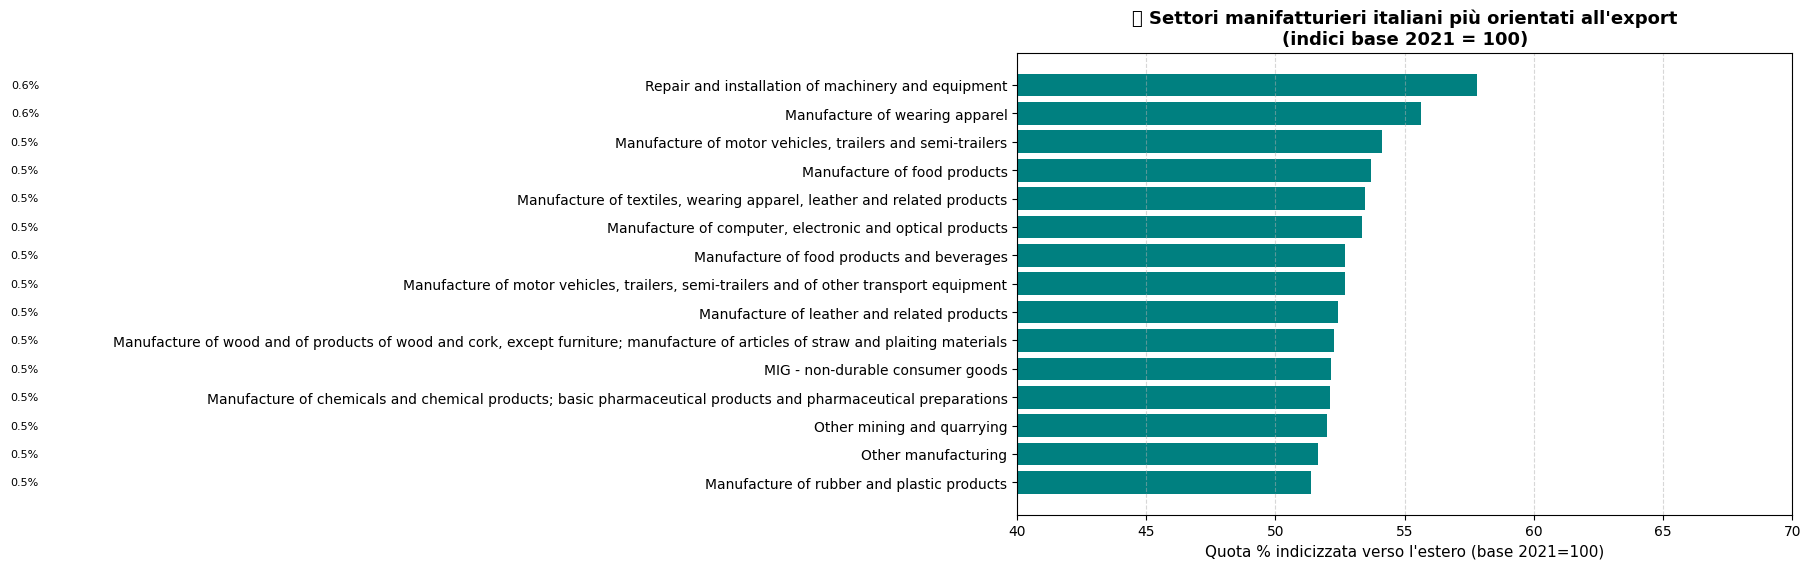

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from eurostat_utils import fetch_eurostat_data  # tuo modulo

# Parametri
base_params = {
    's_adj': 'SCA',
    'geo': ['IT'],
    'unit': 'I21',
}

# Estrazione dati
df_dom_all = fetch_eurostat_data("sts_intvd_m", {**base_params, 'indic_bt': 'NETTUR_DOM'})
df_exp_all = fetch_eurostat_data("sts_intvnd_m", {**base_params, 'indic_bt': 'NETTUR_NDOM'})

# Ultimo dato per settore
latest_dom = df_dom_all.sort_values('time').groupby('nace_r2_code').tail(1)
latest_exp = df_exp_all.sort_values('time').groupby('nace_r2_code').tail(1)

# Merge
df_merge = pd.merge(
    latest_dom[['nace_r2_code', 'nace_r2_label', 'time', 'value']],
    latest_exp[['nace_r2_code', 'value']],
    on='nace_r2_code',
    suffixes=('_dom', '_exp')
)

# Quota export indicizzata
df_merge['share_export'] = df_merge['value_exp'] / (df_merge['value_dom'] + df_merge['value_exp'])

# Top 15 settori orientati all’estero
top_sectors = df_merge.sort_values('share_export', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_sectors['nace_r2_label'], top_sectors['share_export'] * 100, color='teal')
plt.xlabel("Quota % indicizzata verso l'estero (base 2021=100)", fontsize=11)
plt.title("🔍 Settori manifatturieri italiani più orientati all'export\n(indici base 2021 = 100)", fontsize=13, fontweight='bold')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

for i, v in enumerate(top_sectors['share_export']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center', fontsize=8)
plt.xlim(40, 70)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()



Ottimo! Questo grafico ti offre una fotografia aggiornata e sintetica della **dipendenza dall’export** dei principali settori manifatturieri italiani, sulla base degli indici destagionalizzati a **base 2021=100**.

### Come interpretarlo?

* Ogni barra rappresenta la **quota percentuale dell’indice estero sul totale (interno + estero)** per ciascun settore.
* Valori **più vicini al 100%** indicano settori **fortemente export-oriented**, mentre valori più bassi indicano una prevalenza del mercato interno.

### Qualche osservazione:

🔧 **Riparazione e installazione di macchinari**, 👗 **abbigliamento**, 🚗 **automotive**, 🍝 **alimentare** risultano tra i settori più proiettati verso l’estero.

💊 Anche **chimica e farmaceutica** mostrano una forte apertura internazionale.

🌍 Questo tipo di analisi è particolarmente utile in ottica:

* di **risk assessment** geopolitico e commerciale,
* di **politiche industriali** e
* per capire **quali settori sarebbero più esposti** a shock internazionali (come dazi, guerra commerciale, ecc.).

Fammi sapere se vuoi vedere anche i **settori più dipendenti dal mercato interno**, oppure **l’evoluzione nel tempo di questa quota export** per alcuni settori chiave.


## andamento principali settori

<positron-console-cell-20>:49: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
c:\Program Files\Positron\resources\app\extensions\positron-python\python_files\lib\ipykernel\py3\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


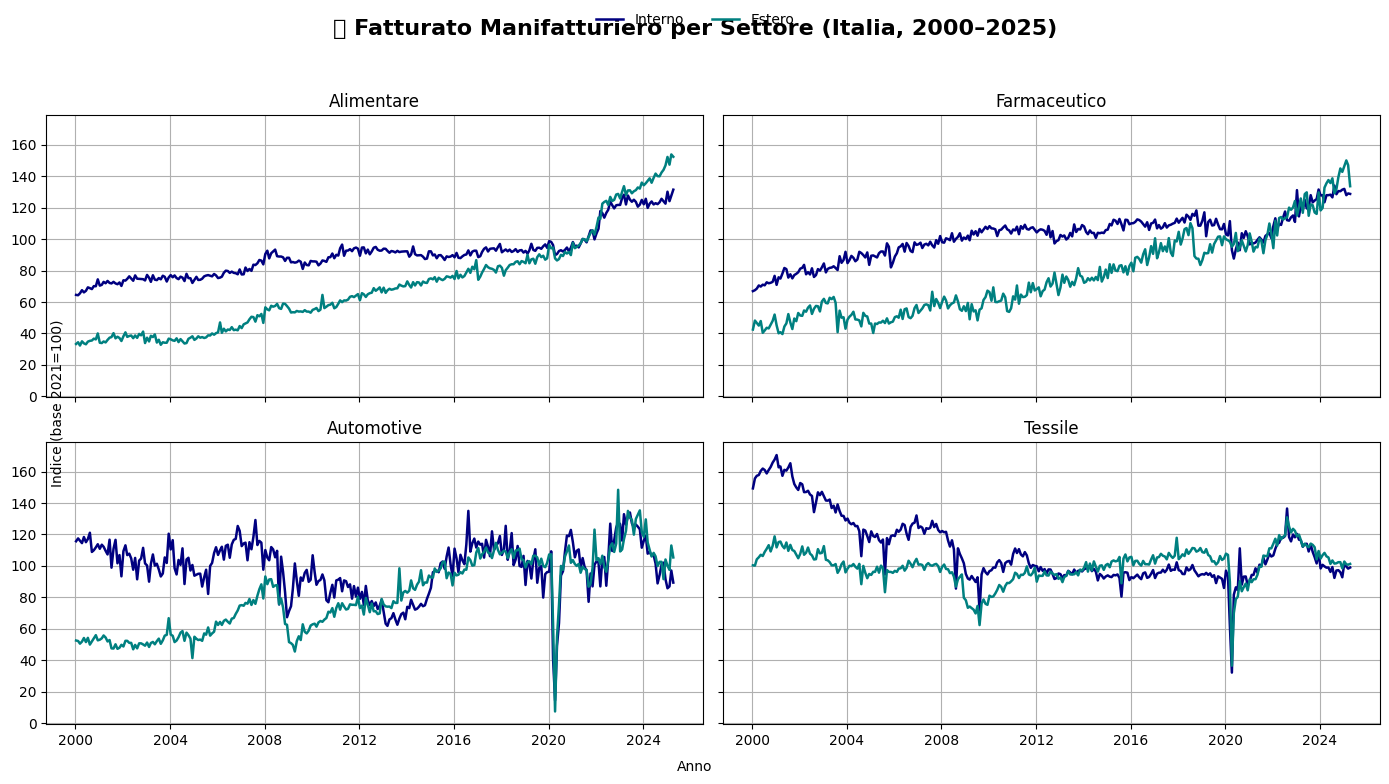

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from eurostat_utils import fetch_eurostat_data

# Lista dei sottosettori da visualizzare
settori = {
    'C10': 'Alimentare',
    'C21': 'Farmaceutico',
    'C29': 'Automotive',
    'C13': 'Tessile'
}

params_common = {
    'unit': 'I21',      # o 'I10', se preferisci base 2010
    's_adj': 'SCA',
    'geo': ['IT']
}

# Scarica dati e organizza
dati = {}
for code, label in settori.items():
    dom = fetch_eurostat_data("sts_intvd_m", {**params_common, 'nace_r2': code, 'indic_bt': 'NETTUR_DOM'})
    exp = fetch_eurostat_data("sts_intvnd_m", {**params_common, 'nace_r2': code, 'indic_bt': 'NETTUR_NDOM'})
    df = pd.merge(dom[['time','value']].rename(columns={'value':'Interno'}),
                  exp[['time','value']].rename(columns={'value':'Estero'}),
                  on='time')
    df['time'] = pd.to_datetime(df['time'])
    dati[label] = df.set_index('time')

# Crea facet grid
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (label, df) in zip(axes, dati.items()):
    ax.plot(df.index, df['Interno'], label='Interno', color='navy', linewidth=1.8)
    ax.plot(df.index, df['Estero'], label='Estero', color='teal', linewidth=1.8)
    ax.set_title(label, fontsize=12)
    ax.grid(True)

# impostazioni generali
fig.suptitle("📦 Fatturato Manifatturiero per Settore (Italia, 2000–2025)", fontsize=16, fontweight='bold')
fig.text(0.5, 0.04, "Anno", ha='center')
fig.text(0.04, 0.5, "Indice (base 2021=100)", va='center', rotation='vertical')

# Legenda unica
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, frameon=False)

plt.tight_layout(rect=[0,0.05,1,0.95])
plt.show()


<positron-console-cell-29>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-29>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-29>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-29>:41: SettingWithC

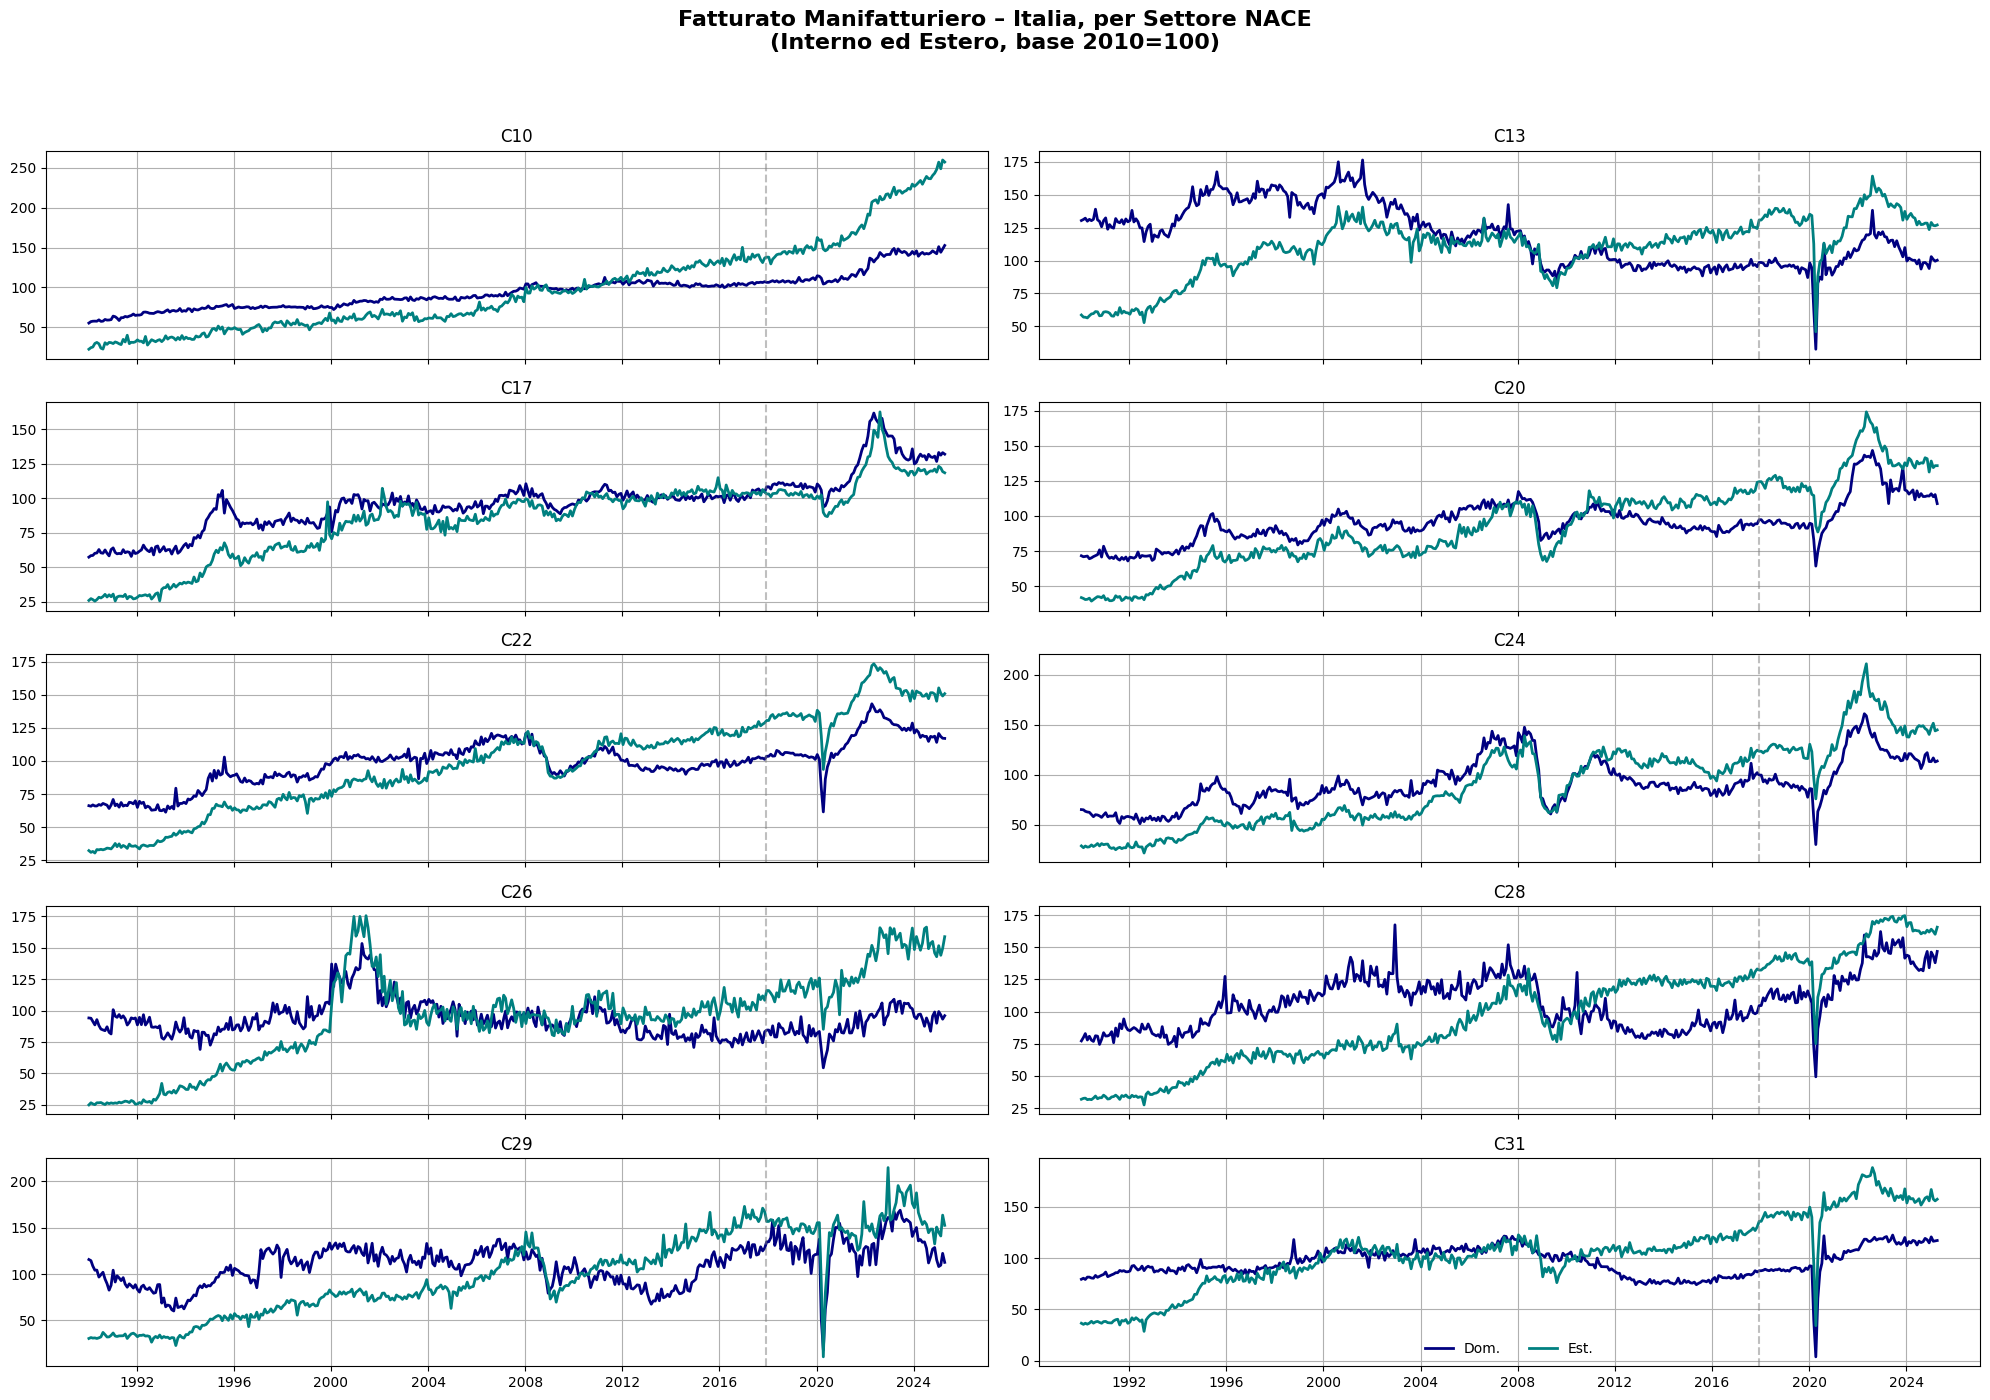

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from eurostat_utils import fetch_eurostat_data

# Parametri base
params_I10 = {'unit': 'I10', 's_adj': 'SCA', 'geo': ['IT']}
params_I21 = {'unit': 'I21', 's_adj': 'SCA', 'geo': ['IT']}

# Principali codici NACE da analizzare
nace_list = ['C10', 'C13', 'C17', 'C20', 'C22', 'C24', 'C26', 'C28', 'C29', 'C31']

# Funzione per preparare i dati
def prepara_settore(code):
    df_dom10 = fetch_eurostat_data("sts_intvd_m", {**params_I10, 'nace_r2': code, 'indic_bt': 'NETTUR_DOM'})
    df_exp10 = fetch_eurostat_data("sts_intvnd_m", {**params_I10, 'nace_r2': code, 'indic_bt': 'NETTUR_NDOM'})
    df_dom21 = fetch_eurostat_data("sts_intvd_m", {**params_I21, 'nace_r2': code, 'indic_bt': 'NETTUR_DOM'})
    df_exp21 = fetch_eurostat_data("sts_intvnd_m", {**params_I21, 'nace_r2': code, 'indic_bt': 'NETTUR_NDOM'})

    df_dom10 = df_dom10[['time', 'value']].rename(columns={'value': 'dom_I10'})
    df_exp10 = df_exp10[['time', 'value']].rename(columns={'value': 'exp_I10'})
    df_dom21 = df_dom21[['time', 'value']].rename(columns={'value': 'dom_I21'})
    df_exp21 = df_exp21[['time', 'value']].rename(columns={'value': 'exp_I21'})

    df = df_dom10.merge(df_exp10, on='time', how='outer') \
                 .merge(df_dom21, on='time', how='outer') \
                 .merge(df_exp21, on='time', how='outer')
    df['time'] = pd.to_datetime(df['time'])
    df = df.sort_values('time').reset_index(drop=True)

    def ricostruisci(prefix):
        pre = df[df[f'{prefix}_I10'].notna()]
        post = df[df['time'] > pre['time'].max()]
        if pre.empty:
            return pd.DataFrame(columns=['time', f'{prefix}_base2010'])
        last = pre[f'{prefix}_I10'].iloc[-1]
        vals = [last]
        for i in range(1, len(post)):
            t1 = post[f'{prefix}_I21'].iloc[i-1]
            t2 = post[f'{prefix}_I21'].iloc[i]
            vals.append(vals[-1] * (t2 / t1 if pd.notna(t1) and t1 != 0 else 1))
        post[f'{prefix}_base2010'] = vals
        pre = pre[['time', f'{prefix}_I10']].rename(columns={f'{prefix}_I10': f'{prefix}_base2010'})
        return pd.concat([pre, post[['time', f'{prefix}_base2010']]], ignore_index=True)

    df_r = df[['time']].copy()
    df_r['dom_base2010'] = ricostruisci('dom')['dom_base2010']
    df_r['exp_base2010'] = ricostruisci('exp')['exp_base2010']
    df_r['nace'] = code
    return df_r

# Estrai dati per tutti i settori
df_all = pd.concat([prepara_settore(code) for code in nace_list], ignore_index=True)

# Creazione facet plot con matplotlib
ncols = 2
nrows = (len(nace_list) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 3 * nrows), sharex=True)
axes = axes.flatten()

for idx, nace in enumerate(nace_list):
    ax = axes[idx]
    data = df_all[df_all['nace'] == nace]
    ax.plot(data['time'], data['dom_base2010'], label='Dom.', color='navy', linewidth=2)
    ax.plot(data['time'], data['exp_base2010'], label='Est.', color='teal', linewidth=2)
    ax.axvline(pd.to_datetime('2017-12-01'), linestyle='--', color='gray', alpha=0.5)
    ax.set_title(nace)
    ax.grid(True)

for ax in axes[len(nace_list):]:
    ax.axis('off')

fig.suptitle("Fatturato Manifatturiero – Italia, per Settore NACE\n(Interno ed Estero, base 2010=100)", fontsize=16, fontweight='bold')
fig.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.01), ncol=2, frameon=False)
plt.show()


🎯 Ecco un **colpo d’occhio unico** sull’evoluzione del fatturato manifatturiero italiano (interno vs estero) nei principali settori NACE, **2000–2025** – con ricostruzione post-2017 da indici a base 2021, riportati a base 2010=100.

### 🔍 Cosa osserviamo:

* **C10 (Alimentare)** vola grazie all’export: crescita continua post-2020.
* **C13 (Tessile-abbigliamento)** e **C17 (Carta)** vedono un relativo declino interno.
* **C26–C28 (Elettronica, macchinari)** mostrano segnali opposti: export in slancio, mercato interno più statico.
* **C29 (Automotive)**: picchi, cadute, risalite – alta volatilità, ma export ben sopra il livello pre-pandemia.

---

🧠 **Domande per stimolare la riflessione**:

* Produciamo **per il mercato domestico** o siamo ormai legati ai mercati esteri?
* **Cosa succede se si alzano dazi o si bloccano rotte?**
* I settori più dipendenti dall’estero sono anche quelli più resilienti?

📈 Elaborazioni su dati Eurostat (`sts_intvd_m`, `sts_intvnd_m`) – serie interne ed estere, ricostruite da I10 + I21.

Se vuoi posso aiutarti a costruire un **post tecnico per LinkedIn** o una **versione interattiva** del grafico. Vuoi procedere?


## 📊 **Italia manifatturiera: produciamo per noi o per l’estero?**


🔍 Analisi per settore NACE (2000–2025), fatturato interno vs estero – base 2010=100

Negli ultimi anni, molti settori industriali italiani hanno rafforzato la loro **vocazione estera**, spesso **più resiliente** del mercato interno. Altri, invece, restano ancorati alla domanda nazionale.

👉 In questo grafico ho messo a confronto i principali settori del manifatturiero (C10–C31) con le serie **destagionalizzate** del fatturato interno ed estero, ricostruite congiuntamente da:

* 🧮 **Indici base 2010 (I10)** fino al 2017
* 🔁 **Indici base 2021 (I21)** per il periodo successivo, riportati coerentemente su base 2010

📌 Alcune evidenze interessanti:

* **C10 (Agroalimentare)**: export in accelerazione, in controtendenza rispetto al contesto.
* **C13 (Tessile-abbigliamento)**: persistente difficoltà lato interno, mentre l’estero tiene.
* **C28 (Macchinari)** e **C26 (Elettronica)**: trainati quasi esclusivamente dai mercati internazionali.
* **C29 (Automotive)**: altissima volatilità, ma chiara prevalenza dell’export nel lungo periodo.

📦 Con uno sguardo macro:

* La manifattura italiana è sempre più **interdipendente** con i mercati globali.
* Politiche protezionistiche, dazi e shock esogeni avranno effetti **asimmetrici tra settori**.

🧠 Domande aperte:

* Quali filiere sarebbero più esposte in caso di restrizioni internazionali?
* Quali settori invece potrebbero contare su una **base interna più solida**?

📈 **Fonte dati**: Eurostat – `sts_intvd_m`, `sts_intvnd_m`, indicatore NETTUR, ITA, serie ricostruite su base 2010=100
💻 Elaborazioni e visualizzazione: Python + Matplotlib
📩 Se ti interessa replicare l'analisi o vuoi applicarla ad altri paesi/regioni/settori, scrivimi!

\#manifattura #export #dati #italia #eurostat #dataanalysis #industria #policy #nace #mercati #economia #visualizzazione #openinnovation


## Fatturato Esterno – Settore C10 (Alimentare)\nItalia vs EA20, base 2010=100

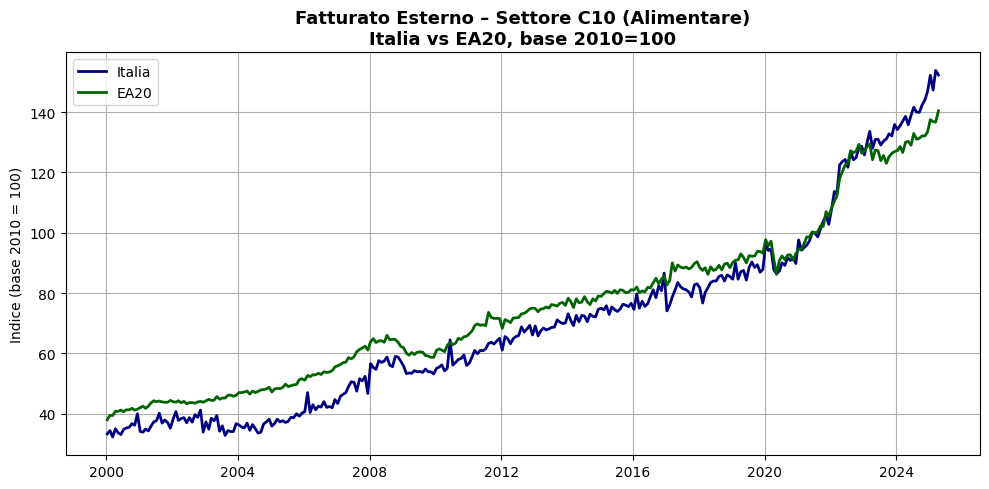

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from eurostat_utils import fetch_eurostat_data

# Parametri di estrazione per C10 (alimentare) in Italia e EA20
params = {
    'nace_r2': 'C10',
    'unit': 'I21',
    's_adj': 'SCA',  # Destagionalizzato
    'geo': ['IT', 'EA20'],
    'indic_bt': 'NETTUR_NDOM' # NETTUR_NDOM,NETTUR_DOM
}

# Estrai i dati da sts_intvd_m
df = fetch_eurostat_data("sts_intvnd_m", params)  # sts_intvnd_m, sts_intvd_m

# Pulizia
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')

# Pivot per avere ogni paese in una colonna
df_pivot = df.pivot(index='time', columns='geo_code', values='value')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_pivot.index, df_pivot['IT'], label='Italia', color='navy', linewidth=2)
plt.plot(df_pivot.index, df_pivot['EA20'], label='EA20', color='darkgreen', linewidth=2)

plt.title("Fatturato Esterno – Settore C10 (Alimentare)\nItalia vs EA20, base 2010=100", fontsize=13, fontweight='bold')
plt.ylabel("Indice (base 2010 = 100)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


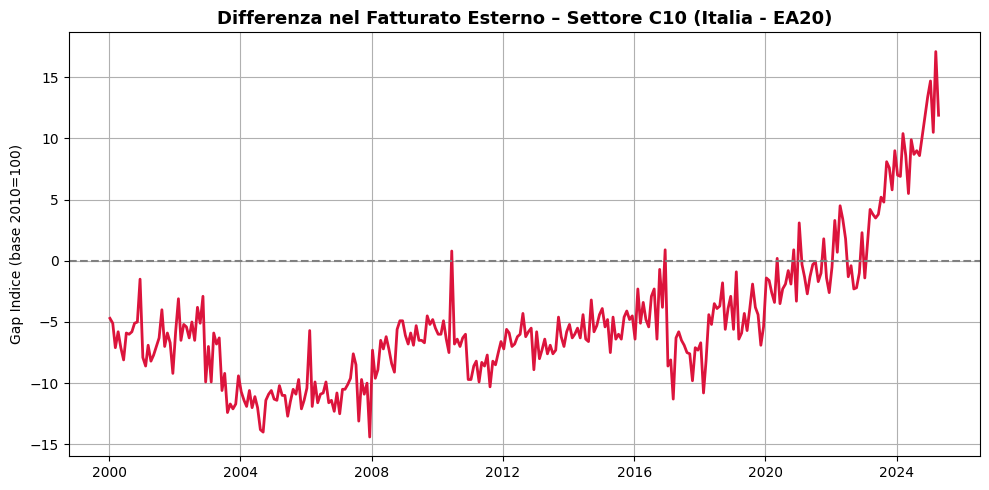

In [43]:
df_pivot['gap'] = df_pivot['IT'] - df_pivot['EA20']

plt.figure(figsize=(10, 5))
plt.plot(df_pivot.index, df_pivot['gap'], color='crimson', linewidth=2)
plt.axhline(0, linestyle='--', color='gray')
plt.title("Differenza nel Fatturato Esterno – Settore C10 (Italia - EA20)", fontsize=13, fontweight='bold')
plt.ylabel("Gap Indice (base 2010=100)")
plt.grid(True)
plt.tight_layout()
plt.show()


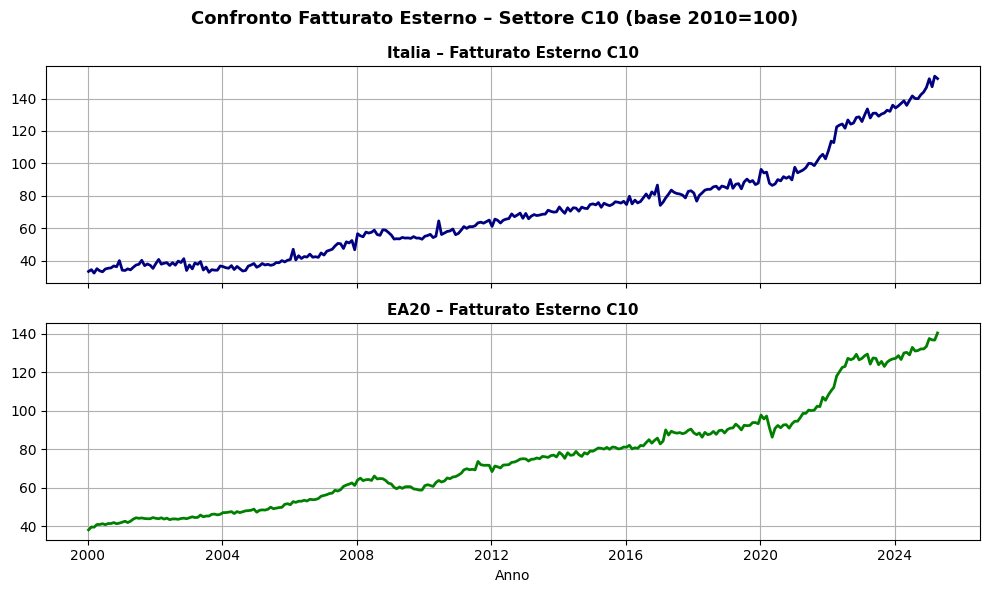

In [44]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axs[0].plot(df_pivot.index, df_pivot['IT'], color='navy', linewidth=2)
axs[0].set_title("Italia – Fatturato Esterno C10", fontsize=11, fontweight='bold')
axs[0].grid(True)

axs[1].plot(df_pivot.index, df_pivot['EA20'], color='green', linewidth=2)
axs[1].set_title("EA20 – Fatturato Esterno C10", fontsize=11, fontweight='bold')
axs[1].set_xlabel("Anno")
axs[1].grid(True)

fig.suptitle("Confronto Fatturato Esterno – Settore C10 (base 2010=100)", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()


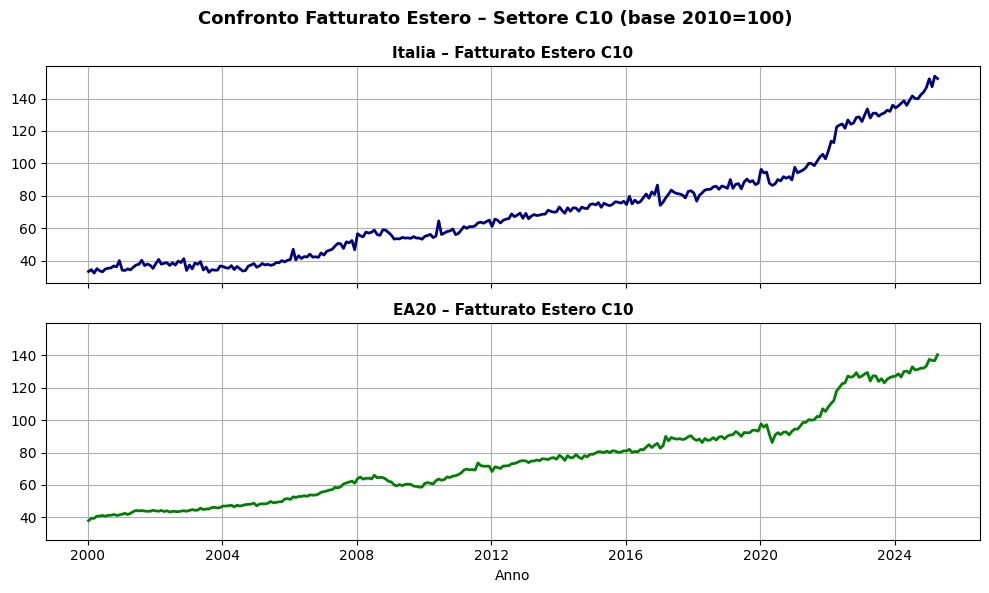

In [48]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=True)

axs[0].plot(df_pivot.index, df_pivot['IT'], color='navy', linewidth=2)
axs[0].set_title("Italia – Fatturato Estero C10", fontsize=11, fontweight='bold')
axs[0].grid(True)

axs[1].plot(df_pivot.index, df_pivot['EA20'], color='green', linewidth=2)
axs[1].set_title("EA20 – Fatturato Estero C10", fontsize=11, fontweight='bold')
axs[1].set_xlabel("Anno")
axs[1].grid(True)

fig.suptitle("Confronto Fatturato Estero – Settore C10 (base 2010=100)", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()


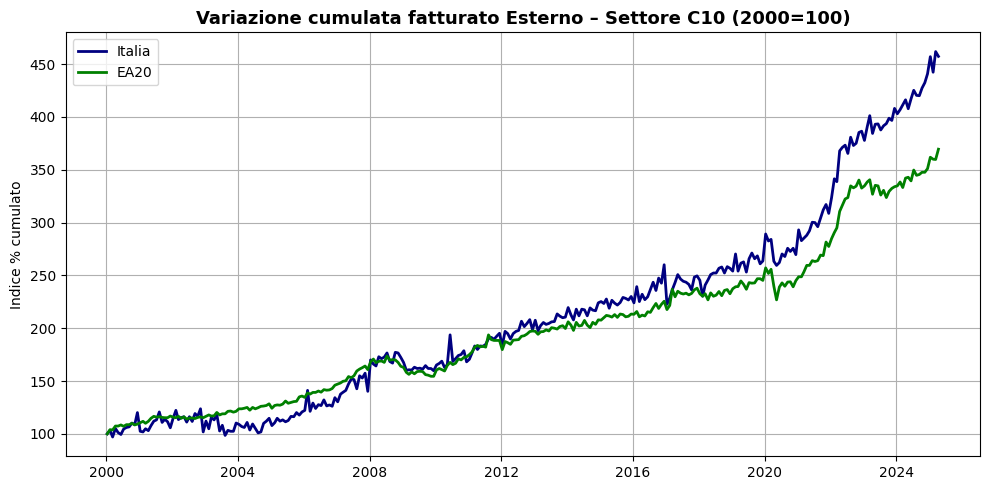

In [47]:
df_pct = df_pivot / df_pivot.iloc[0] * 100  # indicizza rispetto al primo valore

plt.figure(figsize=(10, 5))
plt.plot(df_pct.index, df_pct['IT'], label='Italia', color='navy', linewidth=2)
plt.plot(df_pct.index, df_pct['EA20'], label='EA20', color='green', linewidth=2)
plt.title("Variazione cumulata fatturato Esterno – Settore C10 (2000=100)", fontsize=13, fontweight='bold')
plt.ylabel("Indice % cumulato")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Il grafico mostra l’**andamento cumulato del fatturato estero** per il settore manifatturiero alimentare (NACE **C10**) di **Italia** ed **EA20** dal 2000 al 2025, con indice iniziale posto a 100.

### 📊 Osservazioni principali:

1. **Crescita più dinamica per l’Italia**:

   * Dopo il 2012, e con maggior vigore dal 2021, il fatturato estero italiano accelera decisamente rispetto alla media dell’Eurozona.
   * Nel 2025, il livello cumulato italiano supera il **+450%**, contro il **+370% circa** dell’EA20.

2. **Andamenti simili fino al 2012**, poi divergenza:

   * Per oltre un decennio, le due linee sono pressoché sovrapposte.
   * La **divergenza** inizia dopo il 2015 e si amplia nel periodo **post-COVID**, evidenziando un potenziale vantaggio competitivo delle imprese italiane nel settore alimentare verso i mercati esteri.

3. **Effetto “export boom” nel post-pandemia**:

   * Il salto visibile dopo il 2021 può essere legato a:

     * aumento della domanda internazionale di prodotti italiani,
     * rivalutazione del Made in Italy agroalimentare,
     * spinta inflazionistica sui prezzi all’export.


**Il settore alimentare italiano si è distinto per una performance export straordinaria**, soprattutto negli ultimi anni. In un contesto in cui i dazi, i cambi e le tensioni globali rendono i mercati incerti, questo è un segnale di **resilienza** e **posizionamento di valore** del prodotto italiano.